In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.shape

(400, 5)

In [5]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [6]:
df.isnull().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [7]:
df = df.drop(columns= ['User ID'], axis=1)

In [8]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [10]:
df['Gender'] = le.fit_transform(df['Gender'])
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


C:\Users\Harsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

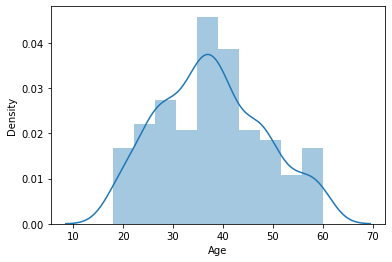

In [11]:
sns.distplot(df['Age'])

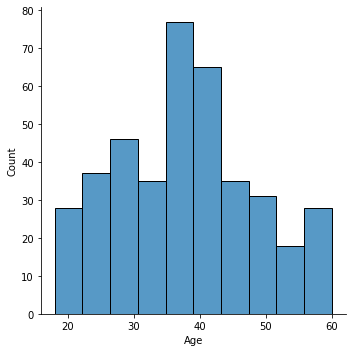

In [12]:
sns.displot(df['Age'])

In [13]:
df.describe()

,Gender,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,0.490000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,0.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


<AxesSubplot:xlabel='EstimatedSalary'>

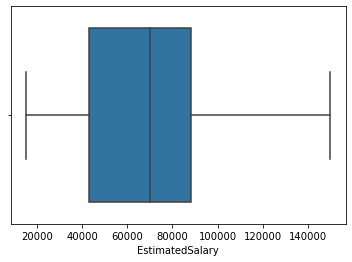

In [14]:
# for outlier checking we use box plot

sns.boxplot(x = df['EstimatedSalary'])

C:\Users\Harsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

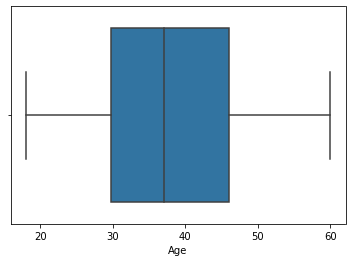

In [15]:
sns.boxplot(df['Age'])

In [16]:
# checking correlation of dataset

df.corr()

,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,-0.060435,0.155238,1.000000,0.362083
Purchased,-0.042469,0.622454,0.362083,1.000000


<AxesSubplot:>

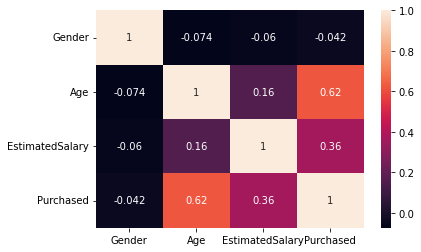

In [17]:
# heatmap

sns.heatmap(df.corr(), annot=True)

In [18]:
df.corr().Purchased.sort_values(ascending = False)

Purchased          1.000000
Age                0.622454
EstimatedSalary    0.362083
Gender            -0.042469
Name: Purchased, dtype: float64

In [19]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [20]:
# scaling of dataset required

In [21]:
# X and Y split

In [22]:
X = df.drop(columns=['Purchased'])

In [23]:
Y = df['Purchased']

In [24]:
# scaling of data

from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [25]:
X_scaled = pd.DataFrame(scale.fit_transform(X), columns = X.columns)
X_scaled.head()

,Gender,Age,EstimatedSalary
0,1.0,0.023810,0.029630
1,1.0,0.404762,0.037037
2,0.0,0.190476,0.207407
3,0.0,0.214286,0.311111
4,1.0,0.023810,0.451852


In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled,Y , test_size=0.2, random_state=0)

In [27]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((320, 3), (80, 3), (320,), (80,))

### Model Building - Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [29]:
model.fit(x_train, y_train)

LogisticRegression()

In [30]:
pred = model.predict(x_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [31]:
y_test

132    0
309    0
341    0
196    0
246    0
      ..
14     0
363    0
304    0
361    1
329    1
Name: Purchased, Length: 80, dtype: int64

In [32]:
model.predict([[1,35,75000]]) # if 1 -> purchased
                              # if 0 -> not purchased

array([1], dtype=int64)

### Evaluation of Classification Model

1. Accuracy Score = Number of Correct Predictions / Total number of predictions made

2. Confusion Matrix

3.

In [33]:
# Accuracy Score

from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_test, pred)

0.925

In [35]:
# confusion metrix

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[58,  0],
       [ 6, 16]], dtype=int64)

In [36]:
pd.crosstab(y_test, pred)

# 0 -> -ve
# 1 -> +ve

col_0,0,1
Purchased,,
0,58,0
1,6,16


             predicted outcome
             
                    -ve    +ve
                    
            -ve     TN      FP
actual value 

            +ve      FN     TP


In [37]:
#accuracy_score = (True Negative + True Positive)/ Total Predictions
#accuracy_score = Correct Predictions / Total Predictions

accuracy_score = (42+24)/80
accuracy_score

0.825

In [38]:
# classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        58
           1       1.00      0.73      0.84        22

    accuracy                           0.93        80
   macro avg       0.95      0.86      0.90        80
weighted avg       0.93      0.93      0.92        80



In [46]:
# precision = Predictions Actually positive/ Total Predicted Positive

In [42]:
# precision = TP / TP+FP
precision = 16/(16+0)
precision

1.0

In [48]:
# Recall -> predicted positively / actually positive
# ->of all real positive cases, how many are predicted positively

In [49]:
#recall = TP / TP+FN
recall = 16/(16+6)
recall

0.7272727272727273

In [50]:
# F1_score -> harmonic mean of precision and recall

In [52]:
f1_score = 2*precision*recall/(precision+recall)
f1_score

0.8421052631578948

In [53]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


### ROC - AUC Score

receiving operating characteristics - area under curve

auc curve --> graph btw tpr(true positive rate) against fpr(false positive rate)

In [54]:
probability = model.predict_proba(x_test)[:,1]
probability

array([0.2144872 , 0.25275401, 0.27923866, 0.18905548, 0.19283512,
       0.05077814, 0.07141131, 0.61971028, 0.04489232, 0.45763683,
       0.11656137, 0.10458125, 0.2498842 , 0.39023091, 0.07753816,
       0.3782384 , 0.33667398, 0.06841339, 0.91815959, 0.12317974,
       0.18405501, 0.8529991 , 0.32802683, 0.73435186, 0.03755646,
       0.87354905, 0.17728525, 0.1753795 , 0.27483994, 0.25154865,
       0.08930984, 0.34527554, 0.78827655, 0.24277786, 0.07252234,
       0.03360677, 0.08785064, 0.15688678, 0.0996113 , 0.48076385,
       0.16428821, 0.33335936, 0.15340067, 0.11910455, 0.66423454,
       0.09922975, 0.34848964, 0.7865558 , 0.05454283, 0.70785041,
       0.92388136, 0.11649016, 0.21455017, 0.42591222, 0.88868144,
       0.35155547, 0.18309699, 0.13003618, 0.44394933, 0.03255284,
       0.08417465, 0.78880947, 0.05821796, 0.40782162, 0.02307795,
       0.89114604, 0.12344655, 0.09967335, 0.28809901, 0.44088787,
       0.5335957 , 0.28599525, 0.06358761, 0.30925421, 0.16693

In [59]:
from sklearn.metrics import roc_auc_score, roc_curve

In [60]:
roc_auc_score(y_test, probability)

0.975705329153605

In [61]:
# from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_auc_score,roc_curve

In [62]:
fpr, tpr, thresholds = roc_curve(y_test, probability)

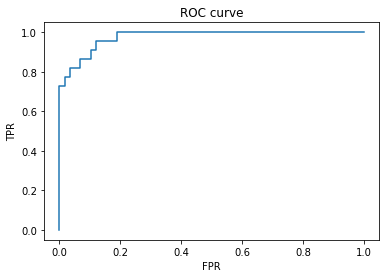

In [63]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()